In [91]:
from time import sleep
import time
import math

from IPython.display import Image

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d
import matplotlib.animation as animation

import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

In [2]:
%matplotlib notebook

In [3]:
device = torch.device("cpu")
device

device(type='cpu')

### Task_1:

Необходимо нормализовать данные в датасете: написать функцию нормализации и использовать ее внутри класса датасета

In [4]:
class LSTM_net(nn.Module):
    def __init__(self, 
                 input_dim,
                 hidden_dim,
                 output_dim,
                 layer_num):

        super().__init__()
        
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim, 
                                  hidden_dim,
                                  layer_num,
                                  batch_first=True)
#         self.dr = torch.nn.Dropout2d(0.25)
        self.fc = torch.nn.Linear(hidden_dim,
                                  output_dim)
        
    def forward(self,inputs):
        x = inputs
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out

In [5]:
skeletons = pd.read_csv("skels.csv")

In [6]:
LABELS = {0: "cheer up", 1: "jump up", 2:  "hand waving", 3: "sitting down", 4: "clapping"}

In [7]:
skeletons.head()

,0,1,2,3,4,5,6,7,8,9,...,3366,3367,3368,3369,3370,3371,3372,3373,3374,labels
0,-0.526048,-0.277147,2.987706,-0.606184,-0.010056,3.010000,-0.681454,0.251614,3.020046,-0.708330,...,-0.619659,0.647852,2.708625,-0.598600,0.593635,2.707864,-0.601837,0.592191,2.697301,0
1,-0.325320,-0.560200,3.244968,-0.296753,-0.312155,3.234485,-0.267607,-0.066345,3.212031,-0.286594,...,-0.066076,-0.459657,3.206000,-0.227804,-0.654428,3.002556,-0.231687,-0.655208,3.000000,1
2,-0.134503,0.387048,3.797468,-0.135835,0.648782,3.669347,-0.137341,0.904024,3.529603,-0.131990,...,-0.332011,0.576840,3.451273,0.011452,0.521624,3.528420,-0.011325,0.589017,3.480000,1
3,0.371560,-0.187321,2.853457,0.388124,0.118966,2.756247,0.402399,0.418116,2.643035,0.354668,...,0.106246,0.619960,2.735462,0.352891,-0.375651,2.625237,0.465385,-0.316062,2.651301,2
4,-0.193082,-0.178566,2.814345,-0.196894,0.114788,2.849780,-0.198289,0.400548,2.872416,-0.178771,...,-0.567993,-0.426740,2.994171,0.102882,-0.492025,3.011537,0.063065,-0.435819,3.055625,3


In [8]:
class Skeleton_Dataset(Dataset):
    def __init__(self,
                 file_path,
                 transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        scaler = MinMaxScaler()
        scaler.fit(self.data)
        labels = self.data.iloc[:, -1]
        self.data = pd.DataFrame(scaler.transform(self.data))
        self.data.iloc[:, -1] = labels

    def __len__(self):
        return len(self.data) 
    
    def __getitem__(self, idx):
        item = np.asarray(self.data.iloc[idx,:-1]).reshape(45,75)
        label = self.data.iloc[idx,-1]
        
        if self.transform != None:
            item = self.transform(item)

        return (item, label) 

In [9]:
dataset = Skeleton_Dataset(file_path = "skels.csv", transform=None)

In [10]:
skel, lab = dataset[147]

skels_for_draw = skel.reshape(-1,25,3)

In [11]:
LABELS[lab]

'jump up'

In [12]:
skel.shape

(45, 75)

In [13]:
skels_for_draw.shape

(45, 25, 3)

In [14]:
bone_pairs = (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25),(25, 12)
)

<IPython.core.display.Javascript object>


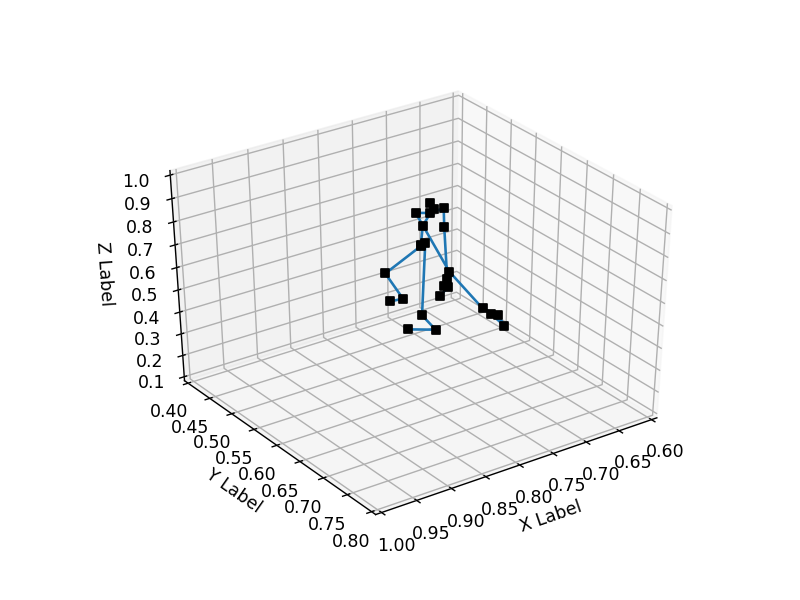

In [15]:
for_draw = skels_for_draw[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for_draw = for_draw

for pair in bone_pairs:
    xs = for_draw[pair[0]-1][0], for_draw[pair[1]-1][0]
    ys = for_draw[pair[0]-1][1], for_draw[pair[1]-1][1]
    zs = for_draw[pair[0]-1][2], for_draw[pair[1]-1][2]

    line = plt3d.art3d.Line3D(zs, xs, ys)
    ax.add_line(line)


for x,y,z in for_draw:
    ax.scatter(z, x, y, color='black', marker='s')

    ax.set_ylim((0.4, 0.8))
    ax.set_zlim((0.1, 1))
    ax.set_xlim((0.6, 1))


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    plt.show()

Анимация прыжка после нормализации, наверно какие-то траблы с датчиками на ногах (ну или как там координаты присваивались)... либо пары для костей для ног как-то некорректно определены, или что-то другое, но анимация ног хромает, в остальном прыжок угадывается.

In [16]:
Image(url='jump.gif')

### Task_3:

http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption - 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). Проделайте весь путь подготовки данных, создания датасета, разделения и обучения модели самостоятельно. Предсказывать нужно Global_active_power.

Смотрим на данные.

In [108]:
df = pd.read_csv('household_power_consumption.txt', sep=';')#, dtype={'Global_active_power': float})

C:\Users\misha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [112]:
df.loc[df['Global_active_power'] == '?'].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


Создаем класс с данными (наследуемся от Dataset).

In [113]:
class PowerConsumptionDataset(Dataset):
    def __init__(self,
                 file_path,
                 series_size,  # Увеличиваем размерность, делая единичным временной ряд значений.
                 transform=None):
        self.data = pd.read_csv(file_path, sep=';', parse_dates=['Date', 'Time'])
        self.data.columns = [column.lower() for column in self.data.columns]
        
        columns = set(self.data.columns)
        columns -= {'time', 'date'}
        self.data = self.data[columns]
        self.data = self.data.dropna()
        self.data = self.data.astype(dict([(column, float) for column in columns]))
        
        self.labels = np.array(self.data['global_active_power'])
        self.data.drop(columns='global_active_power', inplace=True)
        
        
        self.transform = transform
        scaler = MinMaxScaler()
        scaler.fit(self.data)
        self.data = pd.DataFrame(scaler.transform(self.data))
        
        self.data = [self.data[i-series_size:i] for i in range(series_size, self.data.shape[0])]
        self.labels = [self.labels[i] for i in range(series_size, len(self.data))]
        
    def __len__(self):
        return len(self.data) 
    
    def __getitem__(self, idx):
        item = np.asarray(self.data[idx])
        label = self.labels[idx]
        
        if self.transform != None:
            item = self.transform(item)

        return (item, label) 

In [114]:
dataset = PowerConsumptionDataset(file_path="household_power_consumption_.txt",
                                  series_size=10,
                                  transform=None)

In [115]:
dataset[0]

(array([[0.5225    , 0.01369863, 0.85      , 0.        , 0.48618785,
         0.26020184],
        [0.545     , 0.01369863, 0.8       , 0.        , 0.61325967,
         0.20710838],
        [0.6225    , 0.02739726, 0.85      , 0.        , 0.61325967,
         0.19218956],
        [0.6275    , 0.01369863, 0.85      , 0.        , 0.61325967,
         0.21193506],
        [0.66      , 0.01369863, 0.85      , 0.        , 0.41436464,
         0.29706011],
        [0.6525    , 0.02739726, 0.85      , 0.        , 0.39226519,
         0.26810004],
        [0.65      , 0.01369863, 0.85      , 0.        , 0.41436464,
         0.27117157],
        [0.65      , 0.01369863, 0.85      , 0.        , 0.41436464,
         0.27687582],
        [0.6375    , 0.01369863, 0.85      , 0.        , 0.41436464,
         0.22290478],
        [0.6375    , 0.02739726, 0.8       , 0.        , 0.41436464,
         0.21720053]]),
 4.448)

Разделяем данные на обучающую и отложенную выборку.

In [116]:
test_sample_percent = 0.25

In [117]:
train_dataset, test_dataset =\
torch.utils.data.random_split(dataset, [int((1-test_sample_percent)*len(dataset)),int(test_sample_percent*len(dataset))])

train_loader = DataLoader(train_dataset, batch_size = 16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle=True)

Объявляем модель.

In [118]:
class LSTM_net(nn.Module):
    def __init__(self,
                 input_dim,
                 hidden_dim,
                 output_dim,
                 layer_num):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim,
                                  hidden_dim,
                                  layer_num,
                                  batch_first=True)
#         self.dr = torch.nn.Dropout2d(0.25)
        self.fc = torch.nn.Linear(hidden_dim,output_dim)
        
        
    def forward(self,inputs):
        x = inputs
        lstm_out,(hn,cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out.float()

In [119]:
n_hidden = 128
n_joints = 6
n_categories = len(LABELS)
n_layer = 2
rnn = LSTM_net(n_joints,
               n_hidden,
               n_categories,
               n_layer)
rnn.to(device)

LSTM_net(
  (lstm): LSTM(6, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=5, bias=True)
)

In [126]:
criterion = nn.MSELoss()  # nn.CrossEntropyLoss()
learning_rate = 0.0007
optimizer = optim.SGD(rnn.parameters(),
                      lr=learning_rate,
                      momentum=0.9)

all_losses = []
start = time.time()
counter = 0
for epoch in range(100):  
    current_loss = 0
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data[0].to(device), data[1].to(device)
    
        optimizer.zero_grad()
    
        output = rnn(inputs.float())
        
        print(type(labels), type(output))
        print(labels.shape, output.shape)
        print(output)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step() 


        current_loss += loss.item()
        category = LABELS[int(labels[0])]

        if counter % 500 == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            #####сделать более аккуратный вывод для каждой эпохии
            ######сделать обновление графика loss по ходу обучению  
            print('epoch : %d iter : %d (%s) %.4f  / %s %s' % (epoch, i, timeSince(start), loss, guess, correct))

        
        counter = counter + 1
    if counter % 100 == 0:
        all_losses.append(current_loss / 25)
        current_loss = 0
    

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([16]) torch.Size([16, 5])
tensor([[ 0.0443, -0.0958, -0.0192,  0.0422,  0.0179],
        [ 0.0424, -0.0925, -0.0238,  0.0409,  0.0147],
        [ 0.0445, -0.0953, -0.0182,  0.0413,  0.0179],
        [ 0.0465, -0.0959, -0.0184,  0.0414,  0.0175],
        [ 0.0448, -0.0949, -0.0181,  0.0412,  0.0178],
        [ 0.0438, -0.0966, -0.0191,  0.0422,  0.0181],
        [ 0.0439, -0.0898, -0.0255,  0.0405,  0.0137],
        [ 0.0439, -0.0912, -0.0213,  0.0390,  0.0142],
        [ 0.0447, -0.0957, -0.0212,  0.0437,  0.0177],
        [ 0.0456, -0.0894, -0.0222,  0.0406,  0.0147],
        [ 0.0467, -0.0881, -0.0240,  0.0413,  0.0143],
        [ 0.0477, -0.0871, -0.0243,  0.0419,  0.0142],
        [ 0.0436, -0.0914, -0.0248,  0.0415,  0.0146],
        [ 0.0442, -0.0963, -0.0203,  0.0430,  0.0180],
        [ 0.0442, -0.0903, -0.0216,  0.0392,  0.0147],
        [ 0.0454, -0.0889, -0.0213,  0.0393,  0.0145]],
       grad_fn=<AddmmBackward>)


RuntimeError: The size of tensor a (5) must match the size of tensor b (16) at non-singleton dimension 1